In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# asignar url a variable

url = 'https://raw.githubusercontent.com/lorey/list-of-countries/master/csv/countries.csv'

In [5]:
# cargar los datos

df = pd.read_csv(url, sep=';')

print(df.head())

  alpha_2 alpha_3      area           capital continent currency_code  \
0      AD     AND     468.0  Andorra la Vella        EU           EUR   
1      AE     ARE   82880.0         Abu Dhabi        AS           AED   
2      AF     AFG  647500.0             Kabul        AS           AFN   
3      AG     ATG     443.0        St. John's       NaN           XCD   
4      AI     AIA     102.0        The Valley       NaN           XCD   

  currency_name eqivalent_fips_code fips  geoname_id          languages  \
0          Euro                 NaN   AN     3041565                 ca   
1        Dirham                 NaN   AE      290557  ar-AE,fa,en,hi,ur   
2       Afghani                 NaN   AF     1149361  fa-AF,ps,uz-AF,tk   
3        Dollar                 NaN   AC     3576396              en-AG   
4        Dollar                 NaN   AV     3573511              en-AI   

                   name         neighbours  numeric   phone  population  \
0               Andorra            

In [7]:
# observar tamaño del dataframe y nombres de las columnas

print(f'Cantidad de filas y columnas: {df.shape}')
print(f'Nombre de las columnas: {df.columns}')

Cantidad de filas y columnas: (252, 19)
Nombre de las columnas: Index(['alpha_2', 'alpha_3', 'area', 'capital', 'continent', 'currency_code',
       'currency_name', 'eqivalent_fips_code', 'fips', 'geoname_id',
       'languages', 'name', 'neighbours', 'numeric', 'phone', 'population',
       'postal_code_format', 'postal_code_regex', 'tld'],
      dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   alpha_2              251 non-null    object 
 1   alpha_3              252 non-null    object 
 2   area                 252 non-null    float64
 3   capital              246 non-null    object 
 4   continent            210 non-null    object 
 5   currency_code        251 non-null    object 
 6   currency_name        251 non-null    object 
 7   eqivalent_fips_code  1 non-null      object 
 8   fips                 249 non-null    object 
 9   geoname_id           252 non-null    int64  
 10  languages            249 non-null    object 
 11  name                 252 non-null    object 
 12  neighbours           165 non-null    object 
 13  numeric              252 non-null    int64  
 14  phone                247 non-null    object 
 15  population           252 non-null    int

In [15]:
# observar estadistica descriptiva
df.describe()

,area,geoname_id,numeric,population
count,2.520000e+02,2.520000e+02,252.000000,2.520000e+02
mean,5.952879e+05,2.427870e+06,434.309524,2.727679e+07
std,1.904818e+06,1.632093e+06,254.663139,1.164127e+08
min,0.000000e+00,4.951800e+04,0.000000,0.000000e+00
25%,1.098000e+03,1.163774e+06,217.000000,1.879528e+05
50%,6.489450e+04,2.367967e+06,436.000000,4.268583e+06
75%,3.622245e+05,3.478296e+06,652.500000,1.536688e+07
max,1.710000e+07,8.505033e+06,894.000000,1.330044e+09


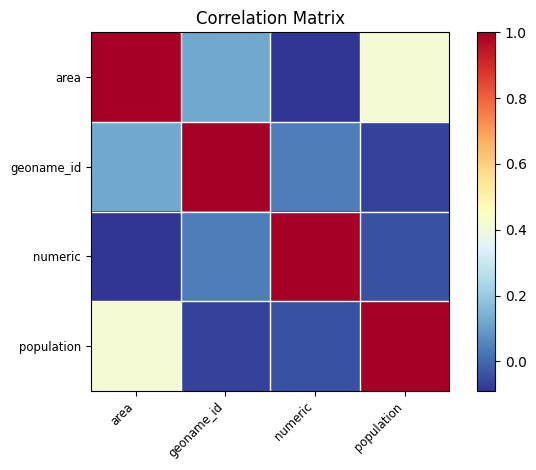

In [23]:
# graficar la correlación entre las variables

corr = df[['area', 'geoname_id', 'numeric', 'population']].corr()

sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.show()

       country  year  population
0  Afghanistan  1952     8425333
1  Afghanistan  1957     9240934
2  Afghanistan  1962    10267083
3  Afghanistan  1967    11537966
4  Afghanistan  1972    13079460
     country  year  population
1416   Spain  1952    28549870
1417   Spain  1957    29841614
1418   Spain  1962    31158061
1419   Spain  1967    32850275
1420   Spain  1972    34513161


<Axes: xlabel='year'>

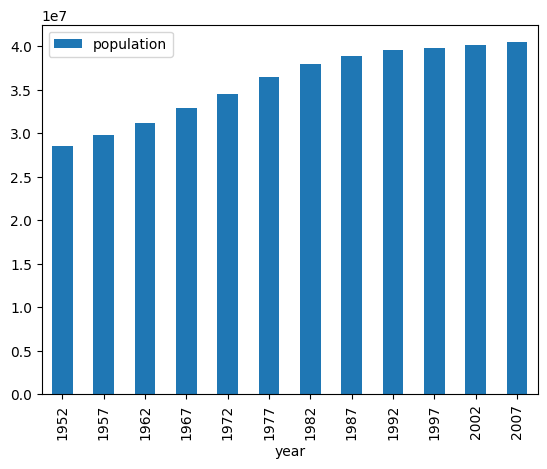

In [25]:
# asigna url a variable

url = 'https://raw.githubusercontent.com/DrueStaples/Population_Growth/master/countries.csv'

df_pop = pd.read_csv(url)
print(df_pop.head())
df_pop_es = df_pop[df_pop['country'] == 'Spain']
print(df_pop_es.head())

# graficar la población de España

df_pop_es.plot(x='year', y='population', kind='bar')

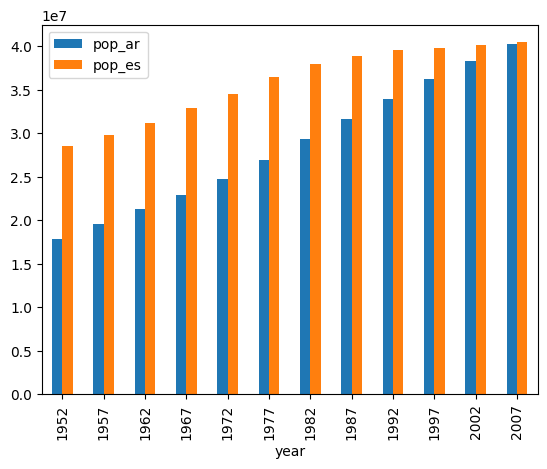

In [29]:
# graficar la población de argentina y comparar con España

df_pop_arg = df_pop[df_pop['country'] == 'Argentina']

anios = df_pop_es['year'].unique()
pop_ar = df_pop_arg['population'].values
pop_es = df_pop_es['population'].values

df_plot = pd.DataFrame({'year': anios, 'pop_ar': pop_ar, 'pop_es': pop_es})

df_plot.plot(x='year', y=['pop_ar', 'pop_es'], kind='bar')
plt.show()


In [30]:
# filtrar paises de habla hispana

df_hispano = df[df['languages'].str.contains('es', na=False)]
print(df_hispano.head())

   alpha_2 alpha_3       area       capital continent currency_code  \
9       AR     ARG  2766890.0  Buenos Aires        SA           ARS   
13      AW     ABW      193.0    Oranjestad       NaN           AWG   
28      BO     BOL  1098580.0         Sucre        SA           BOB   
30      BR     BRA  8511965.0      Brasilia        SA           BRL   
36      BZ     BLZ    22966.0      Belmopan       NaN           BZD   

   currency_name eqivalent_fips_code fips  geoname_id             languages  \
9           Peso                 NaN   AR     3865483  es-AR,en,it,de,fr,gn   
13       Guilder                 NaN   AA     3577279           nl-AW,es,en   
28     Boliviano                 NaN   BL     3923057           es-BO,qu,ay   
30          Real                 NaN   BR     3469034        pt-BR,es,en,fr   
36        Dollar                 NaN   BH     3582678              en-BZ,es   

         name                     neighbours  numeric phone  population  \
9   Argentina          

array([<Axes: title={'center': 'population'}, xlabel='alpha_3'>,
       <Axes: title={'center': 'area'}, xlabel='alpha_3'>], dtype=object)

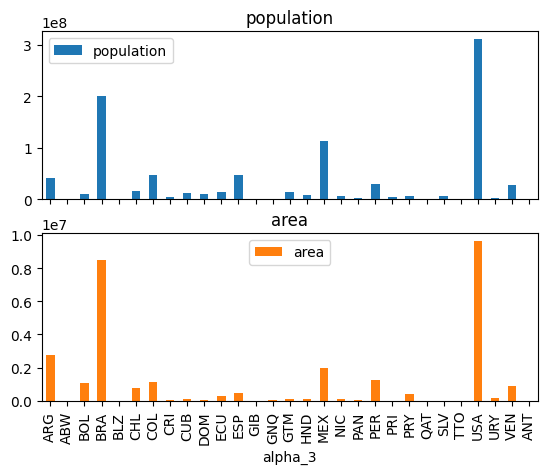

In [32]:
# visualizar población y área de los paises de habla hispana

df_hispano.set_index('alpha_3')[['population', 'area']].plot(kind='bar', subplots=True)

In [38]:
# crear función para detectar outliers

def detect_outliers(df, col):
    col_std = df[col].std()
    col_mean = df[col].mean()
    cut_off = col_std * 2
    lower, upper = col_mean - cut_off, col_mean + cut_off
    outliers = [x for x in df[col] if x < lower or x > upper]

    # encontrar indices de outliers
    outlier_indices = df[(df[col] < lower) | (df[col] > upper)].index
    print(f'Cantidad de outliers: {len(outliers)}') 
    print(f'Outliers: {outliers}')
    print(f'Indices de outliers: {outlier_indices}')
    return outlier_indices

# detectar outliers en la población

outliers = detect_outliers(df_hispano, 'population')
print(outliers)

Cantidad de outliers: 2
Outliers: [201103330, 310232863]
Indices de outliers: Index([30, 233], dtype='int64')
Index([30, 233], dtype='int64')


In [39]:
# mostrar países con outliers

print(df.loc[outliers])

    alpha_2 alpha_3       area     capital continent currency_code  \
30       BR     BRA  8511965.0    Brasilia        SA           BRL   
233      US     USA  9629091.0  Washington       NaN           USD   

    currency_name eqivalent_fips_code fips  geoname_id           languages  \
30           Real                 NaN   BR     3469034      pt-BR,es,en,fr   
233        Dollar                 NaN   US     6252001  en-US,es-US,haw,fr   

              name                     neighbours  numeric phone  population  \
30          Brazil  SR,PE,BO,UY,GY,PY,GF,VE,CO,AR       76    55   201103330   
233  United States                       CA,MX,CU      840     1   310232863   

    postal_code_format postal_code_regex  tld  
30           #####-###     ^\d{5}-\d{3}$  .br  
233         #####-####  ^\d{5}(-\d{4})?$  .us  


In [40]:
# eliminar outliers del df hispano

df_hispano_clean = df_hispano.drop(outliers)

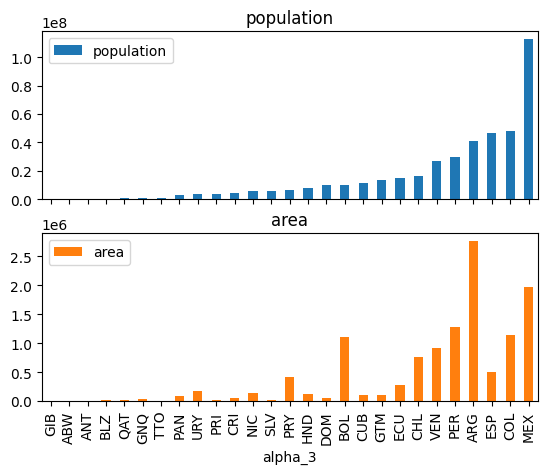

In [43]:
# visualizar población y área de los paises de habla hispana sin outliers

df_hispano_clean.set_index('alpha_3')[['population', 'area']].sort_values(['population']).plot(kind='bar', 
                                                                                               subplots=True)
plt.show()